In [1]:
import pandas as pd
import seaborn as sns

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
df=pd.read_csv("data/openrice.csv")

In [3]:
del df["Unnamed: 0"]

In [4]:
df.head()

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range
0,"Shop J-K., 200 Hollywood Road,",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,133,Below $50
1,"G/F, 108 Hollywood Road,",3492,2,International,20,Blue · Butcher & Meat Specialist,30,$201-400
2,"G/F, 206 Hollywood Road,",5517,5,Thai,31,Chachawan,43,$201-400
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,39,Below $50
4,"G/F, 38 Queens Road West,",1064,1,Indian,50,Namaste Kitchen 滋味廚房,57,$51-100


In [5]:
df.groupby("food_type").sum().sort_values(by="likes",ascending=False).head(10)

,bookmarks,dislikes,likes,number_of_reviews
food_type,,,,
Hong Kong Style,3918171,15553,101483,165450
Japanese,4426517,10284,98388,142268
Western,4690498,9224,92391,134172
Guangdong,3072136,9961,68134,107418
International,2832096,5039,47805,68510
Korean,2038242,4131,45689,63751
Italian,1546262,3331,30506,44453
Coffee Shop,1513336,2525,28763,41443
Stir-Fry,1053175,2877,23239,35181


In [6]:
df["foodtype2"]=df["food_type"]

In [7]:
x=[]
for i in df["food_type"]:
    if i not in ["Hong Kong Style","Guangdong","Japanese","Western","International","Korean","Italian","Coffee Shop"]:
        food="Others"
        x.append(food)
    else:
        x.append(i)

In [8]:
df["foodtype2"]=x
df.head()

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range,foodtype2
0,"Shop J-K., 200 Hollywood Road,",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,133,Below $50,Hong Kong Style
1,"G/F, 108 Hollywood Road,",3492,2,International,20,Blue · Butcher & Meat Specialist,30,$201-400,International
2,"G/F, 206 Hollywood Road,",5517,5,Thai,31,Chachawan,43,$201-400,Others
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,39,Below $50,Hong Kong Style
4,"G/F, 38 Queens Road West,",1064,1,Indian,50,Namaste Kitchen 滋味廚房,57,$51-100,Others


In [9]:
df2=df[["foodtype2","likes","dislikes","price_range"]]
df2.head()

,foodtype2,likes,dislikes,price_range
0,Hong Kong Style,78,6,Below $50
1,International,20,2,$201-400
2,Others,31,5,$201-400
3,Hong Kong Style,23,1,Below $50
4,Others,50,1,$51-100


In [10]:
p1=df2.groupby("foodtype2").sum()

In [11]:
p1["food"]=p1.index
p1

,likes,dislikes,food
foodtype2,,,
Coffee Shop,28763,2525,Coffee Shop
Guangdong,68134,9961,Guangdong
Hong Kong Style,101483,15553,Hong Kong Style
International,47805,5039,International
Italian,30506,3331,Italian
Japanese,98388,10284,Japanese
Korean,45689,4131,Korean
Others,387536,51294,Others
Western,92391,9224,Western


# Matplotlib



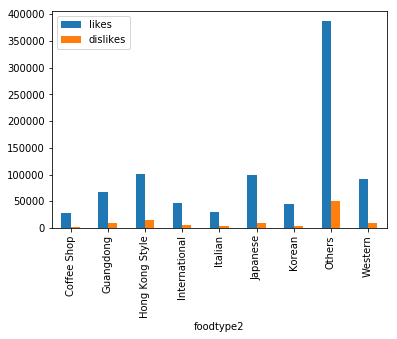

In [12]:
p1.plot(kind="bar")

## Seaborn


In [13]:
p2=p1.append(p1)
p2["likeornot"]="likes"
p2["likeornot"][9:]="dislikes"
p2["value"]=p1["likes"]
p2["value"][9:]=p1["dislikes"]
p2.head(3),p2.tail(3)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(                  likes  dislikes             food likeornot   value
 foodtype2                                                           
 Coffee Shop       28763      2525      Coffee Shop     likes   28763
 Guangdong         68134      9961        Guangdong     likes   68134
 Hong Kong Style  101483     15553  Hong Kong Style     likes  101483,
             likes  dislikes     food likeornot  value
 foodtype2                                            
 Korean      45689      4131   Korean  dislikes   4131
 Others     387536     51294   Others  dislikes  51294
 Western     92391      9224  Western  dislikes   9224)

In [37]:
p2

,likes,dislikes,food,likeornot,value
foodtype2,,,,,
Coffee Shop,28763,2525,Coffee Shop,likes,28763
Guangdong,68134,9961,Guangdong,likes,68134
Hong Kong Style,101483,15553,Hong Kong Style,likes,101483
International,47805,5039,International,likes,47805
Italian,30506,3331,Italian,likes,30506
Japanese,98388,10284,Japanese,likes,98388
Korean,45689,4131,Korean,likes,45689
Others,387536,51294,Others,likes,387536
Western,92391,9224,Western,likes,92391


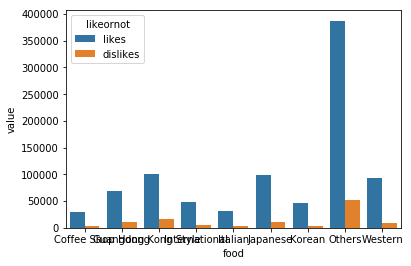

In [14]:
sns.barplot(data=p2,x="food",y="value",hue="likeornot")

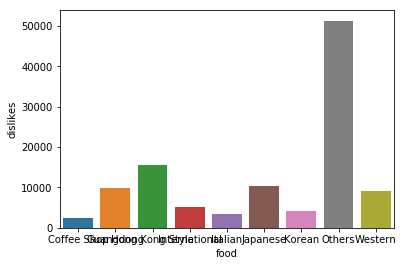

In [15]:
sns.barplot(data=p1,x="food",y="dislikes")

# Plotly

In [16]:
import numpy as np
import scipy as sp
import plotly.plotly as py
import plotly.figure_factory as ff
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot #offline mode else we have to sign up...
from plotly.graph_objs import* #import all the graphs

In [17]:
init_notebook_mode(connected=True)

In [18]:
plotly1=df.groupby("foodtype2").sum()
plotly1["foodtype"]=plotly1.index
plotly1

,bookmarks,dislikes,likes,number_of_reviews,foodtype
foodtype2,,,,,
Coffee Shop,1513336,2525,28763,41443,Coffee Shop
Guangdong,3072136,9961,68134,107418,Guangdong
Hong Kong Style,3918171,15553,101483,165450,Hong Kong Style
International,2832096,5039,47805,68510,International
Italian,1546262,3331,30506,44453,Italian
Japanese,4426517,10284,98388,142268,Japanese
Korean,2038242,4131,45689,63751,Korean
Others,17757583,51294,387536,601435,Others
Western,4690498,9224,92391,134172,Western


In [19]:
plotly2=df.groupby(["foodtype2","price_range"]).sum()
plotly2.head(10)

bookmarks  dislikes  likes  number_of_reviews
foodtype2   price_range                                               
Coffee Shop $101-200        669860      1038  13754              18920
            $201-400         99133       317   2197               3635
            $401-800         17863        41    280                433
            $51-100         563021       936  10025              14790
            Below $50       163459       193   2507               3665
Guangdong   $101-200       1049651      4358  26067              42580
            $201-400        987963      2399  19955              29607
            $401-800        213885       437   4292               6239
            $51-100         432360      1470  10103              16443
            Above $801       21487        24    270                394

In [20]:
table=ff.create_table(plotly1)

In [21]:
iplot(table)

In [22]:
data = [Bar(y=plotly1.likes,x=plotly1.foodtype,name="likes"),Bar(y=plotly1.dislikes,x=plotly1.foodtype,name="dislikes"),Bar(y=plotly1.number_of_reviews,x=plotly1.foodtype,name="Reviews")]

iplot(data)

In [23]:
import plotly.graph_objs as go

In [24]:
trace1=go.Pie(labels=plotly1.foodtype, values=plotly1.likes)
trace2=go.Pie(labels=plotly1.foodtype, values=plotly1.dislikes)
trace3=go.Pie(labels=plotly1.foodtype, values=plotly1.bookmarks)


In [45]:
iplot([trace1])